## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 

<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


In [1]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Carga el 'data/train-balanced-sarcasm.csv' en un df y muestra su inicio

In [47]:
df = pd.read_csv(r"C:\Users\Victor\Desktop\Data2 - copia\3-Machine_Learning\5-NLP\NLTK&CountVectorizer\ejercicios\archive (1)\train-balanced-sarcasm.csv")
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


Some comments are missing, so we drop the corresponding rows.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [49]:
# Haz un dropna a todo el dataframe

In [50]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010771 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010771 non-null  object
 3   subreddit       1010771 non-null  object
 4   score           1010771 non-null  int64 
 5   ups             1010771 non-null  int64 
 6   downs           1010771 non-null  int64 
 7   date            1010771 non-null  object
 8   created_utc     1010771 non-null  object
 9   parent_comment  1010771 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [ ]:
# Eliminamos de la columna 'comment' todo aquello que no sean caracteres de palabra o whitespace, pista: '[^\w\s]'

In [51]:
df["comment"]

0                                                 NC and NH.
1          You do know west teams play against west teams...
2          They were underdogs earlier today, but since G...
3          This meme isn't funny none of the "new york ni...
4                            I could use one of those tools.
                                 ...                        
1010821    I'm sure that Iran and N. Korea have the techn...
1010822                   whatever you do, don't vote green!
1010823    Perhaps this is an atheist conspiracy to make ...
1010824    The Slavs got their own country - it is called...
1010825    values, as in capitalism .. there is good mone...
Name: comment, Length: 1010771, dtype: object

In [52]:
import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df["comment"] = df["comment"].apply(signs_tweets)
df["comment"].head()

C:\Users\Victor\AppData\Local\Temp\ipykernel_2596\4145554894.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                                            nc and nh
1    you do know west teams play against west teams...
2    they were underdogs earlier today but since gr...
3    this meme isn't funny none of the new york nig...
4                       i could use one of those tools
Name: comment, dtype: object

We notice that the dataset is indeed balanced

In [53]:
df["label"].value_counts()

label
0    505403
1    505368
Name: count, dtype: int64

In [6]:
#Miramos cuantos valores tenemos de cada categoria de la columna 'label'

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [ ]:
# Separa los conjuntos de entrenamiento y test

# Usa para el conjunto X la columna 'comment' y para el y la columna 'label'

# Usa un test size del 20% y una semilla de 12 (ojo, 12)

In [54]:
from sklearn.model_selection import train_test_split
X = df["comment"]
y = df["label"]

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=12)

In [30]:
# Muestra X_train

In [55]:
X_train

928225                                in latvia no potatoes
906853    yeah fuck him for waving a scottish flag when ...
884716         is this the one that was bought with bitcoin
270827         just look at the new front page boxbox video
196136                                        we meet again
                                ...                        
564486      i thought sneijder was already an united player
412939                   oh yes because they're stopped now
255371    no dude the fact that boogie couldnt take that...
759479                                let me think about it
472922                  progressive= crazy people on tumblr
Name: comment, Length: 808616, dtype: object

158349                            Where can you farm his SA
265983    but marriott provides dozens of underpaid loca...
75179     EVERYTHING IS OBAMAS FAULT AND HE BIRTHED EVER...
928442                       You just one upped Dave Dictor
886906    u didnt hav fun with gears of war and gta u pc...
                                ...                        
564484    Poor kid was just going out to get some schmok...
412938    and yet the friendzone is not a real thing and...
255370                                     You dropped this
759477                                           Thanks man
472921    Dude dont overhype it that shit is bronze IV t...
Name: comment, Length: 808618, dtype: object

In [ ]:
# Muestra los shapes resultantes

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(808616,)
(202155,)
(808616,)
(202155,)


(808618,)
(202155,)
(808618,)
(202155,)


## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

In [38]:
pip install plotly


  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.3.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.3.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
import plotly.graph_objects as go
import plotly.offline as py

In [57]:
cnt_lbl = df['label'].value_counts()
trace = go.Bar(
    x=cnt_lbl.index,
    y=cnt_lbl.values,
    marker=dict(
        color=cnt_lbl.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Number of Labels',
    font=dict(size=11)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

In [58]:
labels = (np.array(cnt_lbl.index))
sizes = (np.array((cnt_lbl / cnt_lbl.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Label distribution',
    font=dict(size=11),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [43]:
pip install wordcloud

  Using cached wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp310-cp310-win_amd64.whl (299 kB)
Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud, STOPWORDS

In [59]:
from collections import defaultdict
from plotly import tools

train1_df = df[df["label"]==1]
train0_df = df[df["label"]==0]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from not sarcastic comment ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from sarcastic comment ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of not sarcastic comments", 
                                          "Frequent words of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Victor\miniconda3\envs\nlp_env\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [60]:
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of not sarcastic questions", 
                                          "Frequent bigrams of sarcastic questions"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

In [61]:
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of not sarcastic comments", 
                                          "Frequent trigrams of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

In [62]:
from collections import Counter
from nltk import ngrams

ngram_counts = Counter(ngrams(train1_df['comment'].to_json().split(), 2))
ngram_counts

Counter({('in', 'the'): 13362,
         ('of', 'the'): 11995,
         ('to', 'be'): 8304,
         ('is', 'a'): 7614,
         ('on', 'the'): 6666,
         ('for', 'the'): 6211,
         ('to', 'the'): 6132,
         ('all', 'the'): 5336,
         ('is', 'the'): 5142,
         ('going', 'to'): 4475,
         ('have', 'to'): 4422,
         ('if', 'you'): 4169,
         ('have', 'a'): 3807,
         ('in', 'a'): 3794,
         ('to', 'get'): 3745,
         ('the', 'same'): 3581,
         ('this', 'is'): 3541,
         ('need', 'to'): 3511,
         ('it', 'was'): 3496,
         ('out', 'of'): 3411,
         ('they', 'are'): 3348,
         ('want', 'to'): 3333,
         ('with', 'the'): 3330,
         ('be', 'a'): 3316,
         ('would', 'be'): 3280,
         ('must', 'be'): 3227,
         ('to', 'do'): 3207,
         ('like', 'a'): 3205,
         ('you', 'know'): 3148,
         ('for', 'a'): 2845,
         ('of', 'a'): 2845,
         ('and', 'the'): 2831,
         ('you', 'can'): 2808

In [64]:
# Number of words
df["NofWords"] = df["comment"].apply(lambda x: len(str(x)))
df["NofWords"]

C:\Users\Victor\AppData\Local\Temp\ipykernel_2596\3091089055.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0            9
1           73
2          118
3           57
4           30
          ... 
1010821     90
1010822     32
1010823     65
1010824     53
1010825     67
Name: NofWords, Length: 1010771, dtype: int64

In [65]:
# Number of words unique
df["Unique_words"] = df["comment"].apply(lambda x: len(set(str(x))))
df["Unique_words"]

C:\Users\Victor\AppData\Local\Temp\ipykernel_2596\21471465.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0           6
1          19
2          25
3          18
4          13
           ..
1010821    23
1010822    15
1010823    18
1010824    20
1010825    19
Name: Unique_words, Length: 1010771, dtype: int64

In [20]:
# Number of case words


In [71]:
df.iloc[:,10:12]

,NofWords,Unique_words
0,9,6
1,73,19
2,118,25
3,57,18
4,30,13
...,...,...
1010821,90,23
1010822,32,15
1010823,65,18
1010824,53,20


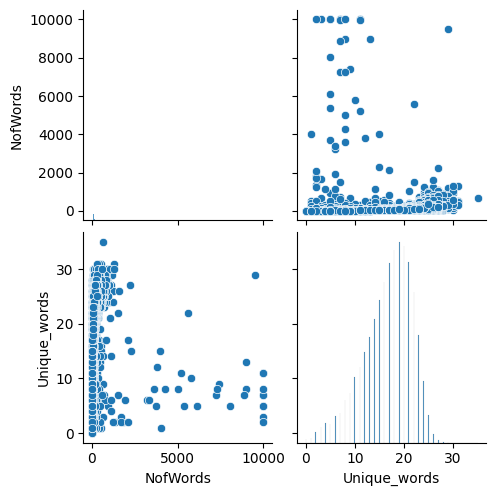

In [76]:
sns.pairplot(df.iloc[:,10:12])


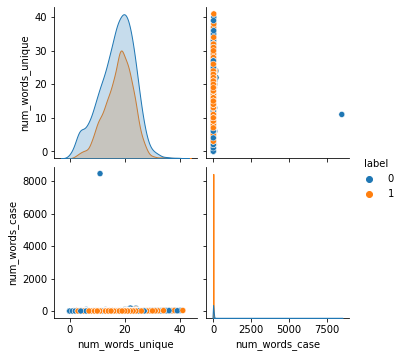

## MODELO


Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3), max_features=50000)),
    ('cls', LogisticRegression())
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy_score(y_test,predictions)

0.7211100393262595

In [45]:
# accuarcy

0.7225198486310009

In [36]:
# confusion matrix

In [89]:
cm = confusion_matrix(y_test, predictions)
cm

array([[76437, 24468],
       [31911, 69339]], dtype=int64)

<Axes: >

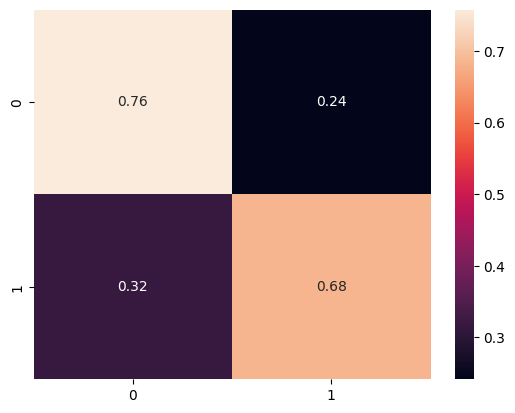

In [90]:
sns.heatmap(cm/cm.sum (axis=1), annot= True)

In [92]:
pip install eli5

     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     ----- ------------------------------- 30.7/216.2 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 216.2/216.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107762 sha256=26770bf854fa076bbb218db833083947e9a8e6a0b999fa4718dacbd5c900fe2a
  Stored in directory: c:\users\victor\appdata\local\pip\cache\wheels\b8\58\ef\2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Note: you may need to restart the kernel to use updated packages.


In [93]:
import eli5

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (c:\Users\Victor\miniconda3\envs\nlp_env\lib\site-packages\sklearn\utils\metaestimators.py)

In [46]:
eli5.show_weights(estimator=pipeline.named_steps['log_reg'],
                  vec=pipeline.named_steps['tf_idf'],
                  top = 50)

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Weight?,Feature
+9.742,yes because
+7.732,clearly
+7.661,yeah because
+7.276,im sure
+7.239,obviously
+6.924,totally
+5.950,because
+5.777,right because
+5.739,dont you know
+5.711,how dare
